<a href="https://colab.research.google.com/github/roldugina/freecodecamp_data_analysis_projects/blob/main/medical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [42]:
df=pd.read_csv("https://raw.githubusercontent.com/roldugina/freecodecamp_data_analysis_projects/main/medical_data_visualizer/medical_examination.csv")

In [43]:
df.tail()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [89]:
#defining masks

mask_ap=(df['ap_hi']>=df['ap_lo'])

height_2_5=np.percentile(df['height'],2.5)
height_97_5=np.percentile(df['height'],97.5)
mask_height=(df['height']>=height_2_5)&(df['height']<=height_97_5)

weight_2_5=np.percentile(df['weight'],2.5)
weight_97_5=np.percentile(df['weight'],97.5)
mask_weight=(df['weight']>=weight_2_5)&(df['weight']<=weight_97_5)

In [90]:
#saving outliers

df_ap=df.loc[~mask_ap]
df_height=df_cleaned.loc[~mask_height]
df_weight=df_cleaned.loc[~mask_weight]

In [97]:
#cleaning the data

df_cleaned=df.loc[mask_ap&mask_height&mask_weight]
df_cleaned

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


<Axes: >

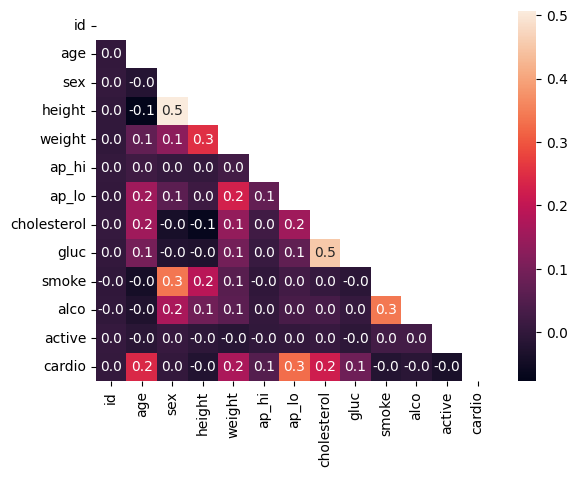

In [99]:
corr_matr=df_cleaned.corr()
x=corr_matr.shape[0]
mask_corr=np.triu(np.ones((x,x)))
sns.heatmap(corr_matr,annot=True,fmt='.1f',mask=mask_corr)



In [103]:
df_cleaned['BMI']=1

<ipython-input-103-322583816401>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['BMI']=1
